# EDA

##Import libraries

In [404]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import mstats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline
sns.set()

## load Data

In [405]:
data = pd.read_csv(r'/content/heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


##Discovring data for data reprossing

In [406]:
data.shape

(918, 12)

In [407]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [408]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [409]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [410]:
#discovering the data of each coulmn
print("Age is", data['Age'].unique())
print("sex is", data['Sex'].unique())
print("ChestPainType is ", data['ChestPainType'].unique())
print("RestingBP ", data['RestingBP'].unique())
print("Cholesterol ", data['Cholesterol'].unique())
print("FastingBS ", data['FastingBS'].unique())
print("RestingECG ", data['RestingECG'].unique())
print("MaxHR ", data['MaxHR'].unique())
print("ExerciseAngina ", data['ExerciseAngina'].unique())
print("Oldpeak ", data['Oldpeak'].unique())
print("ST_Slope ", data['ST_Slope'].unique())
print("HeartDisease ", data['HeartDisease'].unique())

Age is [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
sex is ['M' 'F']
ChestPainType is  ['ATA' 'NAP' 'ASY' 'TA']
RestingBP  [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
Cholesterol  [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266

In [411]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

#### -----> There is no missing values

In [412]:
import pandas as pd

heart_disease_counts = data['HeartDisease'].value_counts()

print(heart_disease_counts)

1    508
0    410
Name: HeartDisease, dtype: int64


#### ----> The data is balanced

In [413]:
# Check for duplicates
duplicates = data.duplicated()

# Print values if duplicates exist
if duplicates.any():
    for index, value in duplicates.items():
        if value:
            print(index, value)
else:
    print("No duplicated values found.")

No duplicated values found.


#### ----> There is no duplicated values

## EDA For Categorical Features

### univariate analysis for categorical variable

#### (First_CAT "Sex")

In [414]:
data['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

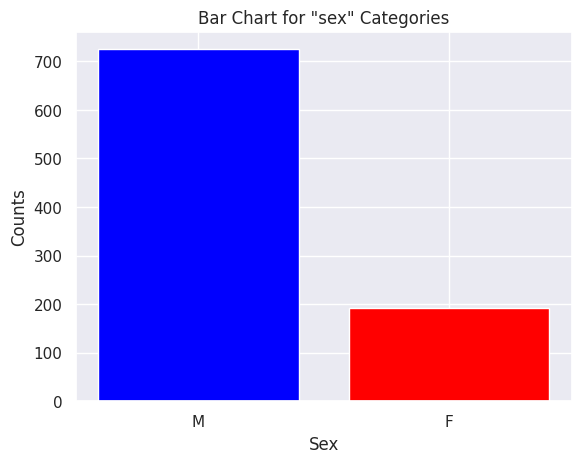

In [415]:
sex_counts = data['Sex'].value_counts()

# Create bar chart
plt.bar(sex_counts.index, sex_counts.values, color=['blue', 'red'])

# Set labels and title
plt.xlabel('Sex')
plt.ylabel('Counts')
plt.title('Bar Chart for "sex" Categories')

# Display the chart
plt.show()

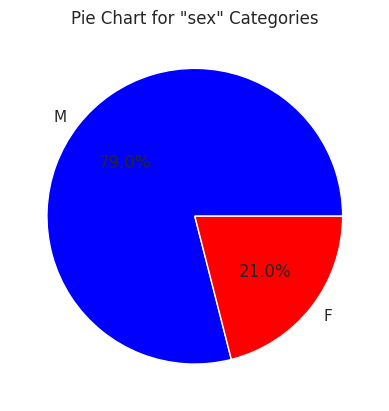

In [416]:
# Calculate the value counts for each category
sex_counts = data['Sex'].value_counts()

# Create pie chart
colors = ['blue', 'red']
plt.pie(sex_counts, labels=sex_counts.index, colors=colors, autopct='%1.1f%%')


# Set title
plt.title('Pie Chart for "sex" Categories')

# Display the chart
plt.show()

#### ----> the num of men in the dataset more than the num of female

#### (secound_CAT "Chest Pain Type")

In [417]:
data['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

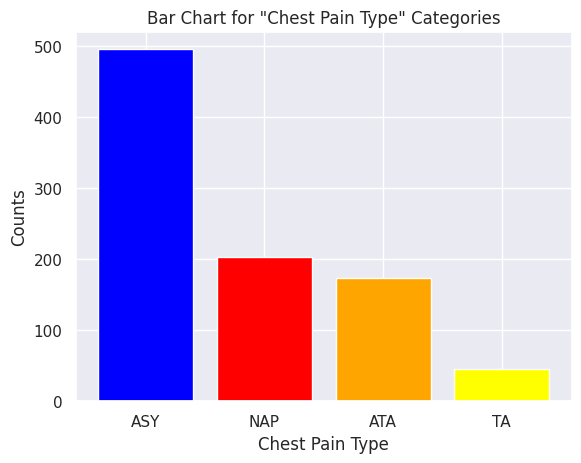

In [418]:
ChestPainType_counts = data['ChestPainType'].value_counts()

# Create bar chart
plt.bar(ChestPainType_counts.index, ChestPainType_counts.values, color=['blue', 'red','orange','yellow'])

# Set labels and title
plt.xlabel('Chest Pain Type')
plt.ylabel('Counts')
plt.title('Bar Chart for "Chest Pain Type" Categories')

# Display the chart
plt.show()

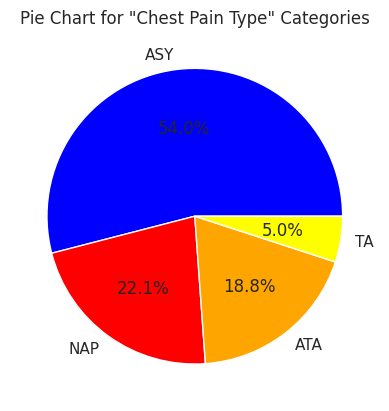

In [419]:
# Calculate the value counts for each category
ChestPainType_counts = data['ChestPainType'].value_counts()

# Create pie chart
colors =['blue', 'red','orange','yellow']
plt.pie(ChestPainType_counts, labels=ChestPainType_counts.index, colors=colors, autopct='%1.1f%%')


# Set title
plt.title('Pie Chart for "Chest Pain Type" Categories')

# Display the chart
plt.show()

#### -----> The biggest num of Chest Pain Type in dataset is Asy

#### (Third_CAT "Fasting BS")

In [420]:
data['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

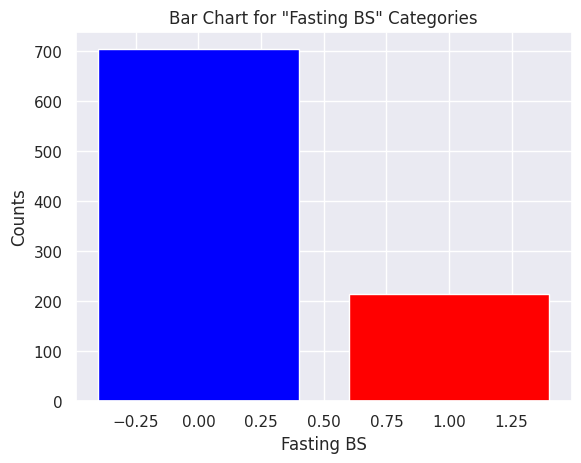

In [421]:
FastingBS_counts = data['FastingBS'].value_counts()

# Create bar chart
plt.bar(FastingBS_counts.index, FastingBS_counts.values, color=['blue', 'red'])

# Set labels and title
plt.xlabel('Fasting BS')
plt.ylabel('Counts')
plt.title('Bar Chart for "Fasting BS" Categories')

# Display the chart
plt.show()

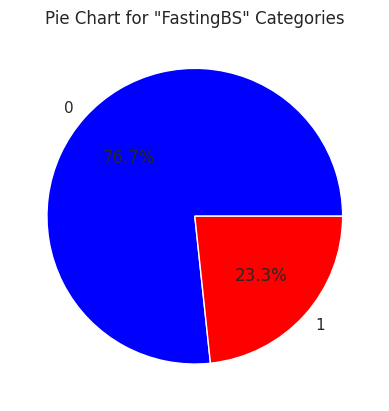

In [422]:
# Calculate the value counts for each category
FastingBS_counts = data['FastingBS'].value_counts()

# Create pie chart
colors =['blue', 'red',]
plt.pie(FastingBS_counts, labels=FastingBS_counts.index, colors=colors, autopct='%1.1f%%')


# Set title
plt.title('Pie Chart for "FastingBS" Categories')

# Display the chart
plt.show()

#### ---> the biggest fastingBS categories is 0 (Normal fasting blood sugar)

#### (Fourth_CAT "Resting ECG")

In [423]:
data['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

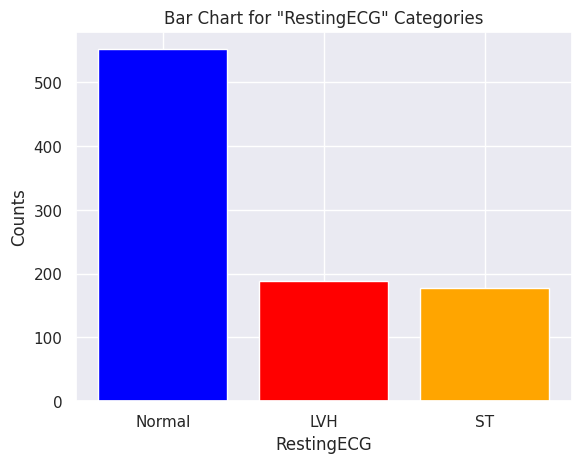

In [424]:
RestingECG_counts = data['RestingECG'].value_counts()

# Create bar chart
plt.bar(RestingECG_counts.index, RestingECG_counts.values, color=['blue', 'red','orange'])

# Set labels and title
plt.xlabel('RestingECG')
plt.ylabel('Counts')
plt.title('Bar Chart for "RestingECG" Categories')

# Display the chart
plt.show()

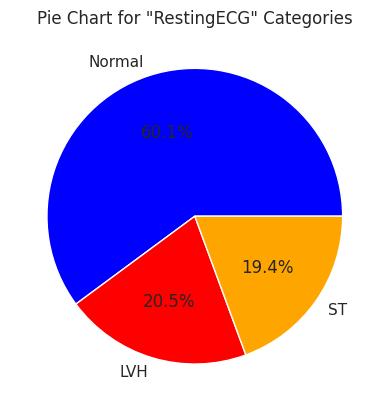

In [425]:
# Calculate the value counts for each category
RestingECG_counts = data['RestingECG'].value_counts()

# Create pie chart
colors =['blue', 'red','orange']
plt.pie(RestingECG_counts, labels=RestingECG_counts.index, colors=colors, autopct='%1.1f%%')


# Set title
plt.title('Pie Chart for "RestingECG" Categories')

# Display the chart
plt.show()

#### ---> the biggest Resting ECG categories is Normal

#### (Fifth_CAT "Resting ECG")

In [426]:
data['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

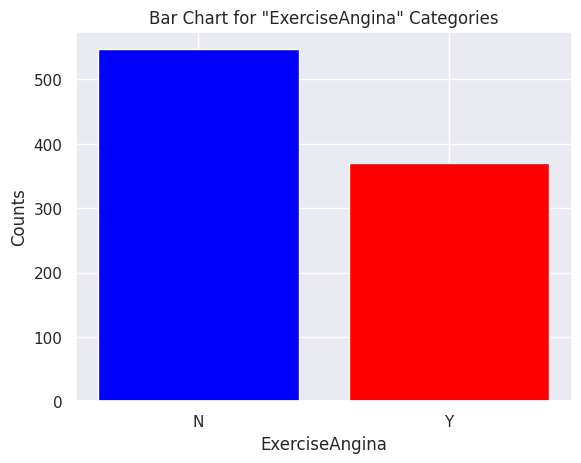

In [427]:
ExerciseAngina_counts = data['ExerciseAngina'].value_counts()

# Create bar chart
plt.bar(ExerciseAngina_counts.index, ExerciseAngina_counts.values, color=['blue', 'red'])

# Set labels and title
plt.xlabel('ExerciseAngina')
plt.ylabel('Counts')
plt.title('Bar Chart for "ExerciseAngina" Categories')

# Display the chart
plt.show()

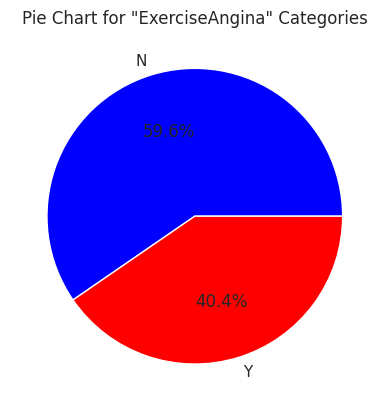

In [428]:
# Calculate the value counts for each category
ExerciseAngina_counts = data['ExerciseAngina'].value_counts()

# Create pie chart
colors =['blue', 'red']
plt.pie(ExerciseAngina_counts, labels=ExerciseAngina_counts.index, colors=colors, autopct='%1.1f%%')


# Set title
plt.title('Pie Chart for "ExerciseAngina" Categories')

# Display the chart
plt.show()

#### ---> the biggest Exercise Angina categories is N (Negative)

 #### (VI _CAT "ST_Slope")

In [429]:
data['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

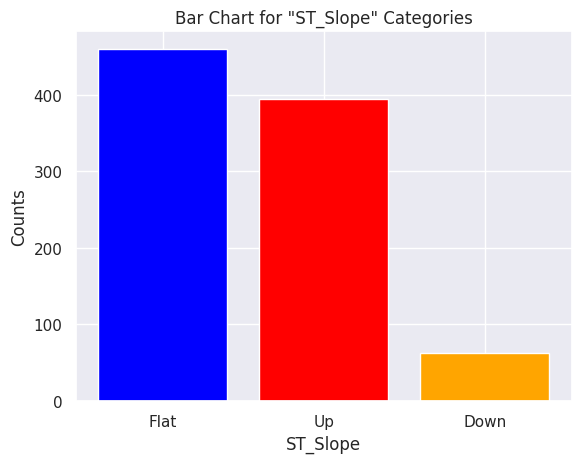

In [430]:
ST_Slope_counts = data['ST_Slope'].value_counts()

# Create bar chart
plt.bar(ST_Slope_counts.index, ST_Slope_counts.values, color=['blue', 'red','orange'])

# Set labels and title
plt.xlabel('ST_Slope')
plt.ylabel('Counts')
plt.title('Bar Chart for "ST_Slope" Categories')

# Display the chart
plt.show()

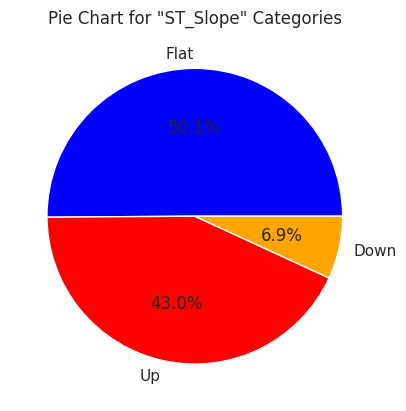

In [431]:
# Calculate the value counts for each category
ST_Slope_counts = data['ST_Slope'].value_counts()

# Create pie chart
colors =['blue', 'red','orange']
plt.pie(ST_Slope_counts, labels=ST_Slope_counts.index, colors=colors, autopct='%1.1f%%')


# Set title
plt.title('Pie Chart for "ST_Slope" Categories')

# Display the chart
plt.show()

#### ---> the biggest ST_Slope categories is flat

### Chi_squre  Test

#### (Sex, heart deases )

In [432]:
# Create a contingency table of the predictor variable and the target variable
contingency_table = pd.crosstab(data['Sex'], data['HeartDisease'])

# Perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print("contingency_table:")
print( contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

# Check the significance
alpha = 0.05
if p_value < alpha:
    print("The numeric categorical is significantly associated with the categorical target.")
else:
    print("The numeric categorical is not significantly associated with the categorical target.")

contingency_table:
HeartDisease    0    1
Sex                   
F             143   50
M             267  458
Chi-square statistic: 84.14510134633775
P-value: 4.597617450809164e-20
Degrees of freedom: 1
Expected frequencies:
[[ 86.19825708 106.80174292]
 [323.80174292 401.19825708]]
The numeric categorical is significantly associated with the categorical target.


#### (Chest PainType, heart deases )

In [433]:
# Create a contingency table of the predictor variable and the target variable
contingency_table = pd.crosstab(data['ChestPainType'], data['HeartDisease'])

# Perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print("contingency_table:")
print( contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

# Check the significance
alpha = 0.05
if p_value < alpha:
    print("The numeric categorical is significantly associated with the categorical target.")
else:
    print("The numeric categorical is not significantly associated with the categorical target.")

contingency_table:
HeartDisease     0    1
ChestPainType          
ASY            104  392
ATA            149   24
NAP            131   72
TA              26   20
Chi-square statistic: 268.06723902181767
P-value: 8.08372842808765e-58
Degrees of freedom: 3
Expected frequencies:
[[221.52505447 274.47494553]
 [ 77.26579521  95.73420479]
 [ 90.66448802 112.33551198]
 [ 20.54466231  25.45533769]]
The numeric categorical is significantly associated with the categorical target.


#### (FastingBS, heart deases )

In [434]:
# Create a contingency table of the predictor variable and the target variable
contingency_table = pd.crosstab(data['FastingBS'], data['HeartDisease'])

# Perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print("contingency_table:")
print( contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

# Check the significance
alpha = 0.05
if p_value < alpha:
    print("The numeric categorical is significantly associated with the categorical target.")
else:
    print("The numeric categorical is not significantly associated with the categorical target.")

contingency_table:
HeartDisease    0    1
FastingBS             
0             366  338
1              44  170
Chi-square statistic: 64.3206790933594
P-value: 1.0573018731809955e-15
Degrees of freedom: 1
Expected frequencies:
[[314.42265795 389.57734205]
 [ 95.57734205 118.42265795]]
The numeric categorical is significantly associated with the categorical target.


#### (RestingECG, heart deases )

In [435]:
# Create a contingency table of the predictor variable and the target variable
contingency_table = pd.crosstab(data['RestingECG'], data['HeartDisease'])

# Perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print("contingency_table:")
print( contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

# Check the significance
alpha = 0.05
if p_value < alpha:
    print("The numeric categorical is significantly associated with the categorical target.")
else:
    print("The numeric categorical is not significantly associated with the categorical target.")

contingency_table:
HeartDisease    0    1
RestingECG            
LVH            82  106
Normal        267  285
ST             61  117
Chi-square statistic: 10.931469339140978
P-value: 0.0042292328167544925
Degrees of freedom: 2
Expected frequencies:
[[ 83.96514161 104.03485839]
 [246.53594771 305.46405229]
 [ 79.49891068  98.50108932]]
The numeric categorical is significantly associated with the categorical target.


#### (ExerciseAngina, heart deases )

In [436]:
# Create a contingency table of the predictor variable and the target variable
contingency_table = pd.crosstab(data['ExerciseAngina'], data['HeartDisease'])

# Perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print("contingency_table:")
print( contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

# Check the significance
alpha = 0.05
if p_value < alpha:
    print("The numeric categorical is significantly associated with the categorical target.")
else:
    print("The numeric categorical is not significantly associated with the categorical target.")

contingency_table:
HeartDisease      0    1
ExerciseAngina          
N               355  192
Y                55  316
Chi-square statistic: 222.25938271530583
P-value: 2.907808387659878e-50
Degrees of freedom: 1
Expected frequencies:
[[244.30283224 302.69716776]
 [165.69716776 205.30283224]]
The numeric categorical is significantly associated with the categorical target.


#### (ST_Slope, heart deases )

In [437]:
# Create a contingency table of the predictor variable and the target variable
contingency_table = pd.crosstab(data['ST_Slope'], data['HeartDisease'])

# Perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print("contingency_table:")
print( contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

# Check the significance
alpha = 0.05
if p_value < alpha:
    print("The numeric categorical is significantly associated with the categorical target.")
else:
    print("The numeric categorical is not significantly associated with the categorical target.")

contingency_table:
HeartDisease    0    1
ST_Slope              
Down           14   49
Flat           79  381
Up            317   78
Chi-square statistic: 355.91844319207905
P-value: 5.167637689470128e-78
Degrees of freedom: 2
Expected frequencies:
[[ 28.1372549   34.8627451 ]
 [205.44662309 254.55337691]
 [176.416122   218.583878  ]]
The numeric categorical is significantly associated with the categorical target.


#### ---> All Categorcal Data Are Important

## EDA on numerical variables

#### Univariate Analysis

In [438]:
# select all columns with  numeric values
numeric_df = data.select_dtypes(include='number')


# storing proberty id in another variable , as it  will not be included in analysis or modeling
id = numeric_df ['HeartDisease']

numeric_df.drop ("HeartDisease", axis =1,inplace=True  )
numeric_df.drop ("FastingBS", axis =1,inplace=True  )

Age


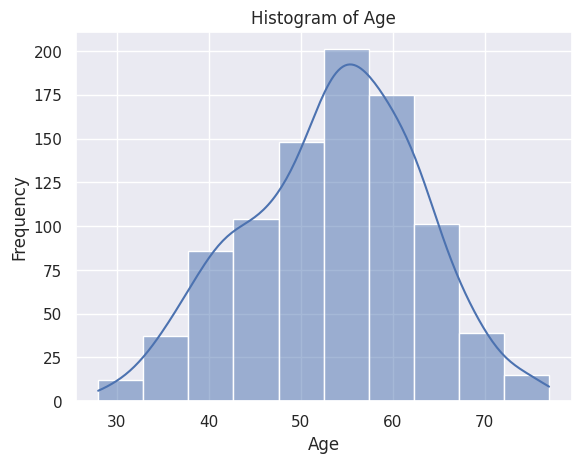

RestingBP


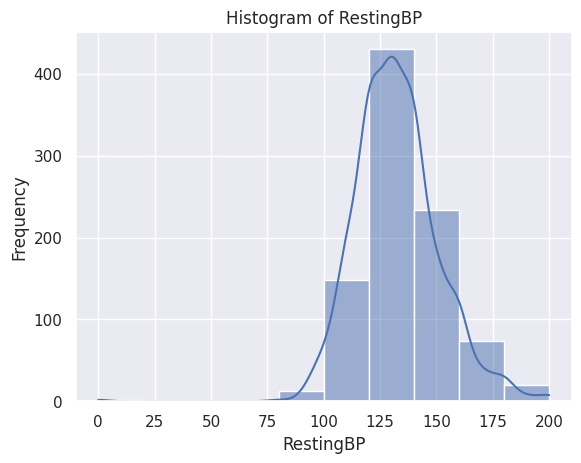

Cholesterol


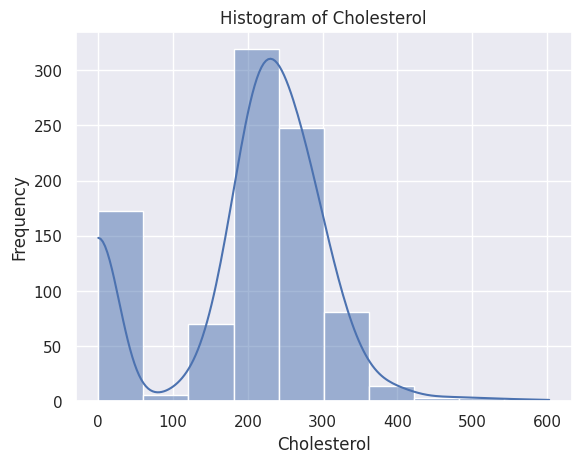

MaxHR


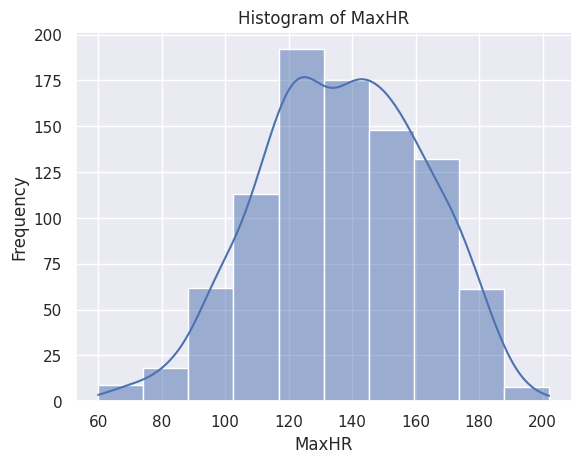

Oldpeak


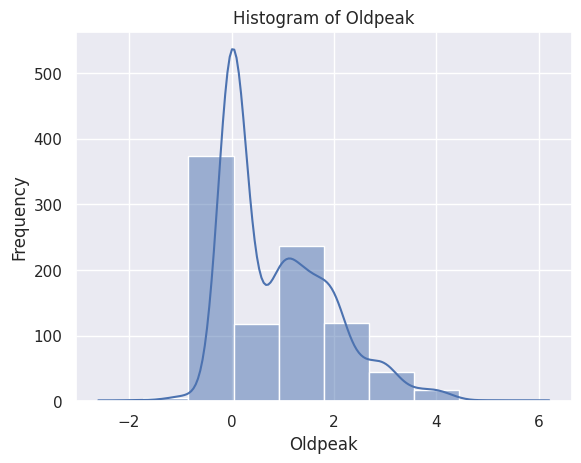

In [439]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in numeric_df.columns:
    plt.figure()
    print(column)
    sns.histplot(numeric_df[column], bins=10, kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

####  checking for outliers using Box plot

Age


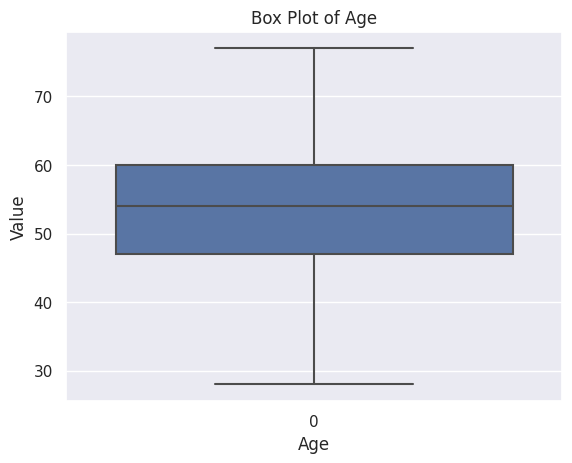

RestingBP


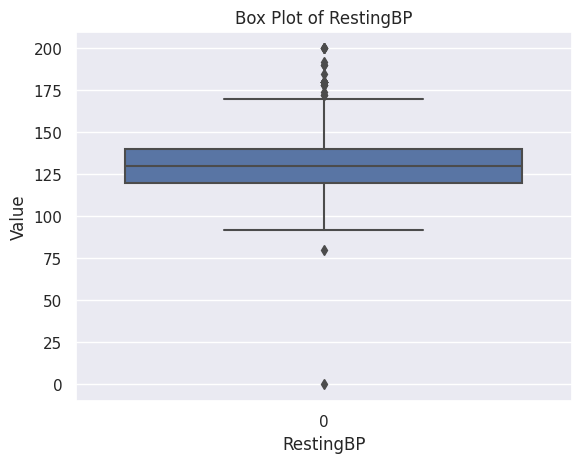

Cholesterol


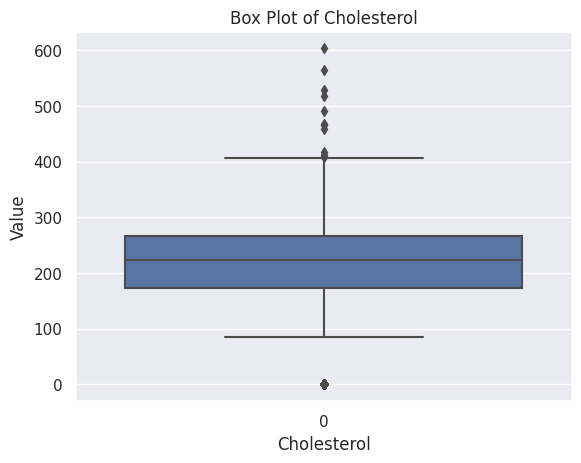

MaxHR


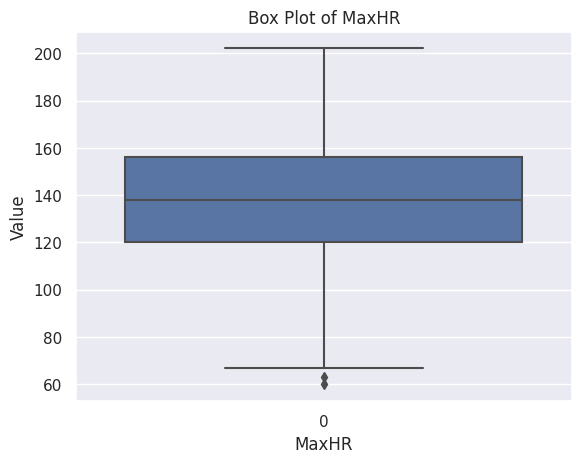

Oldpeak


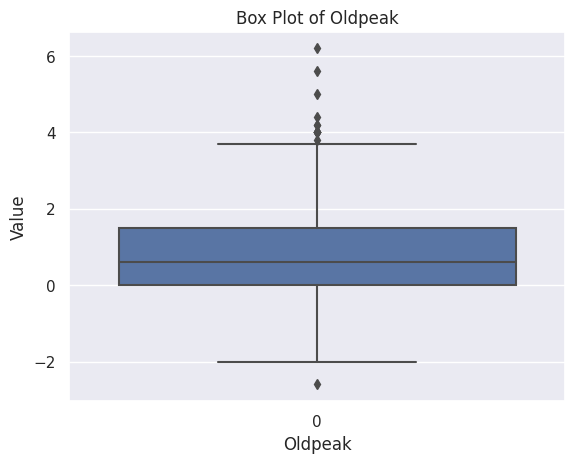

In [440]:
for column in numeric_df.columns:
    plt.figure()
    print(column)
    sns.boxplot(numeric_df[column])
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.title(f'Box Plot of {column}')
    plt.show()

#### ---> from boxplot we note that restingBP has value=0 and this illogical outlires and has outliesrs , Cholestrelor has value=0 and this illogical outlires and has outliesrs, , and oldpeak has outlires   

#### check for multicollinearity using (scatter matrix -corr_matrix -VIF )

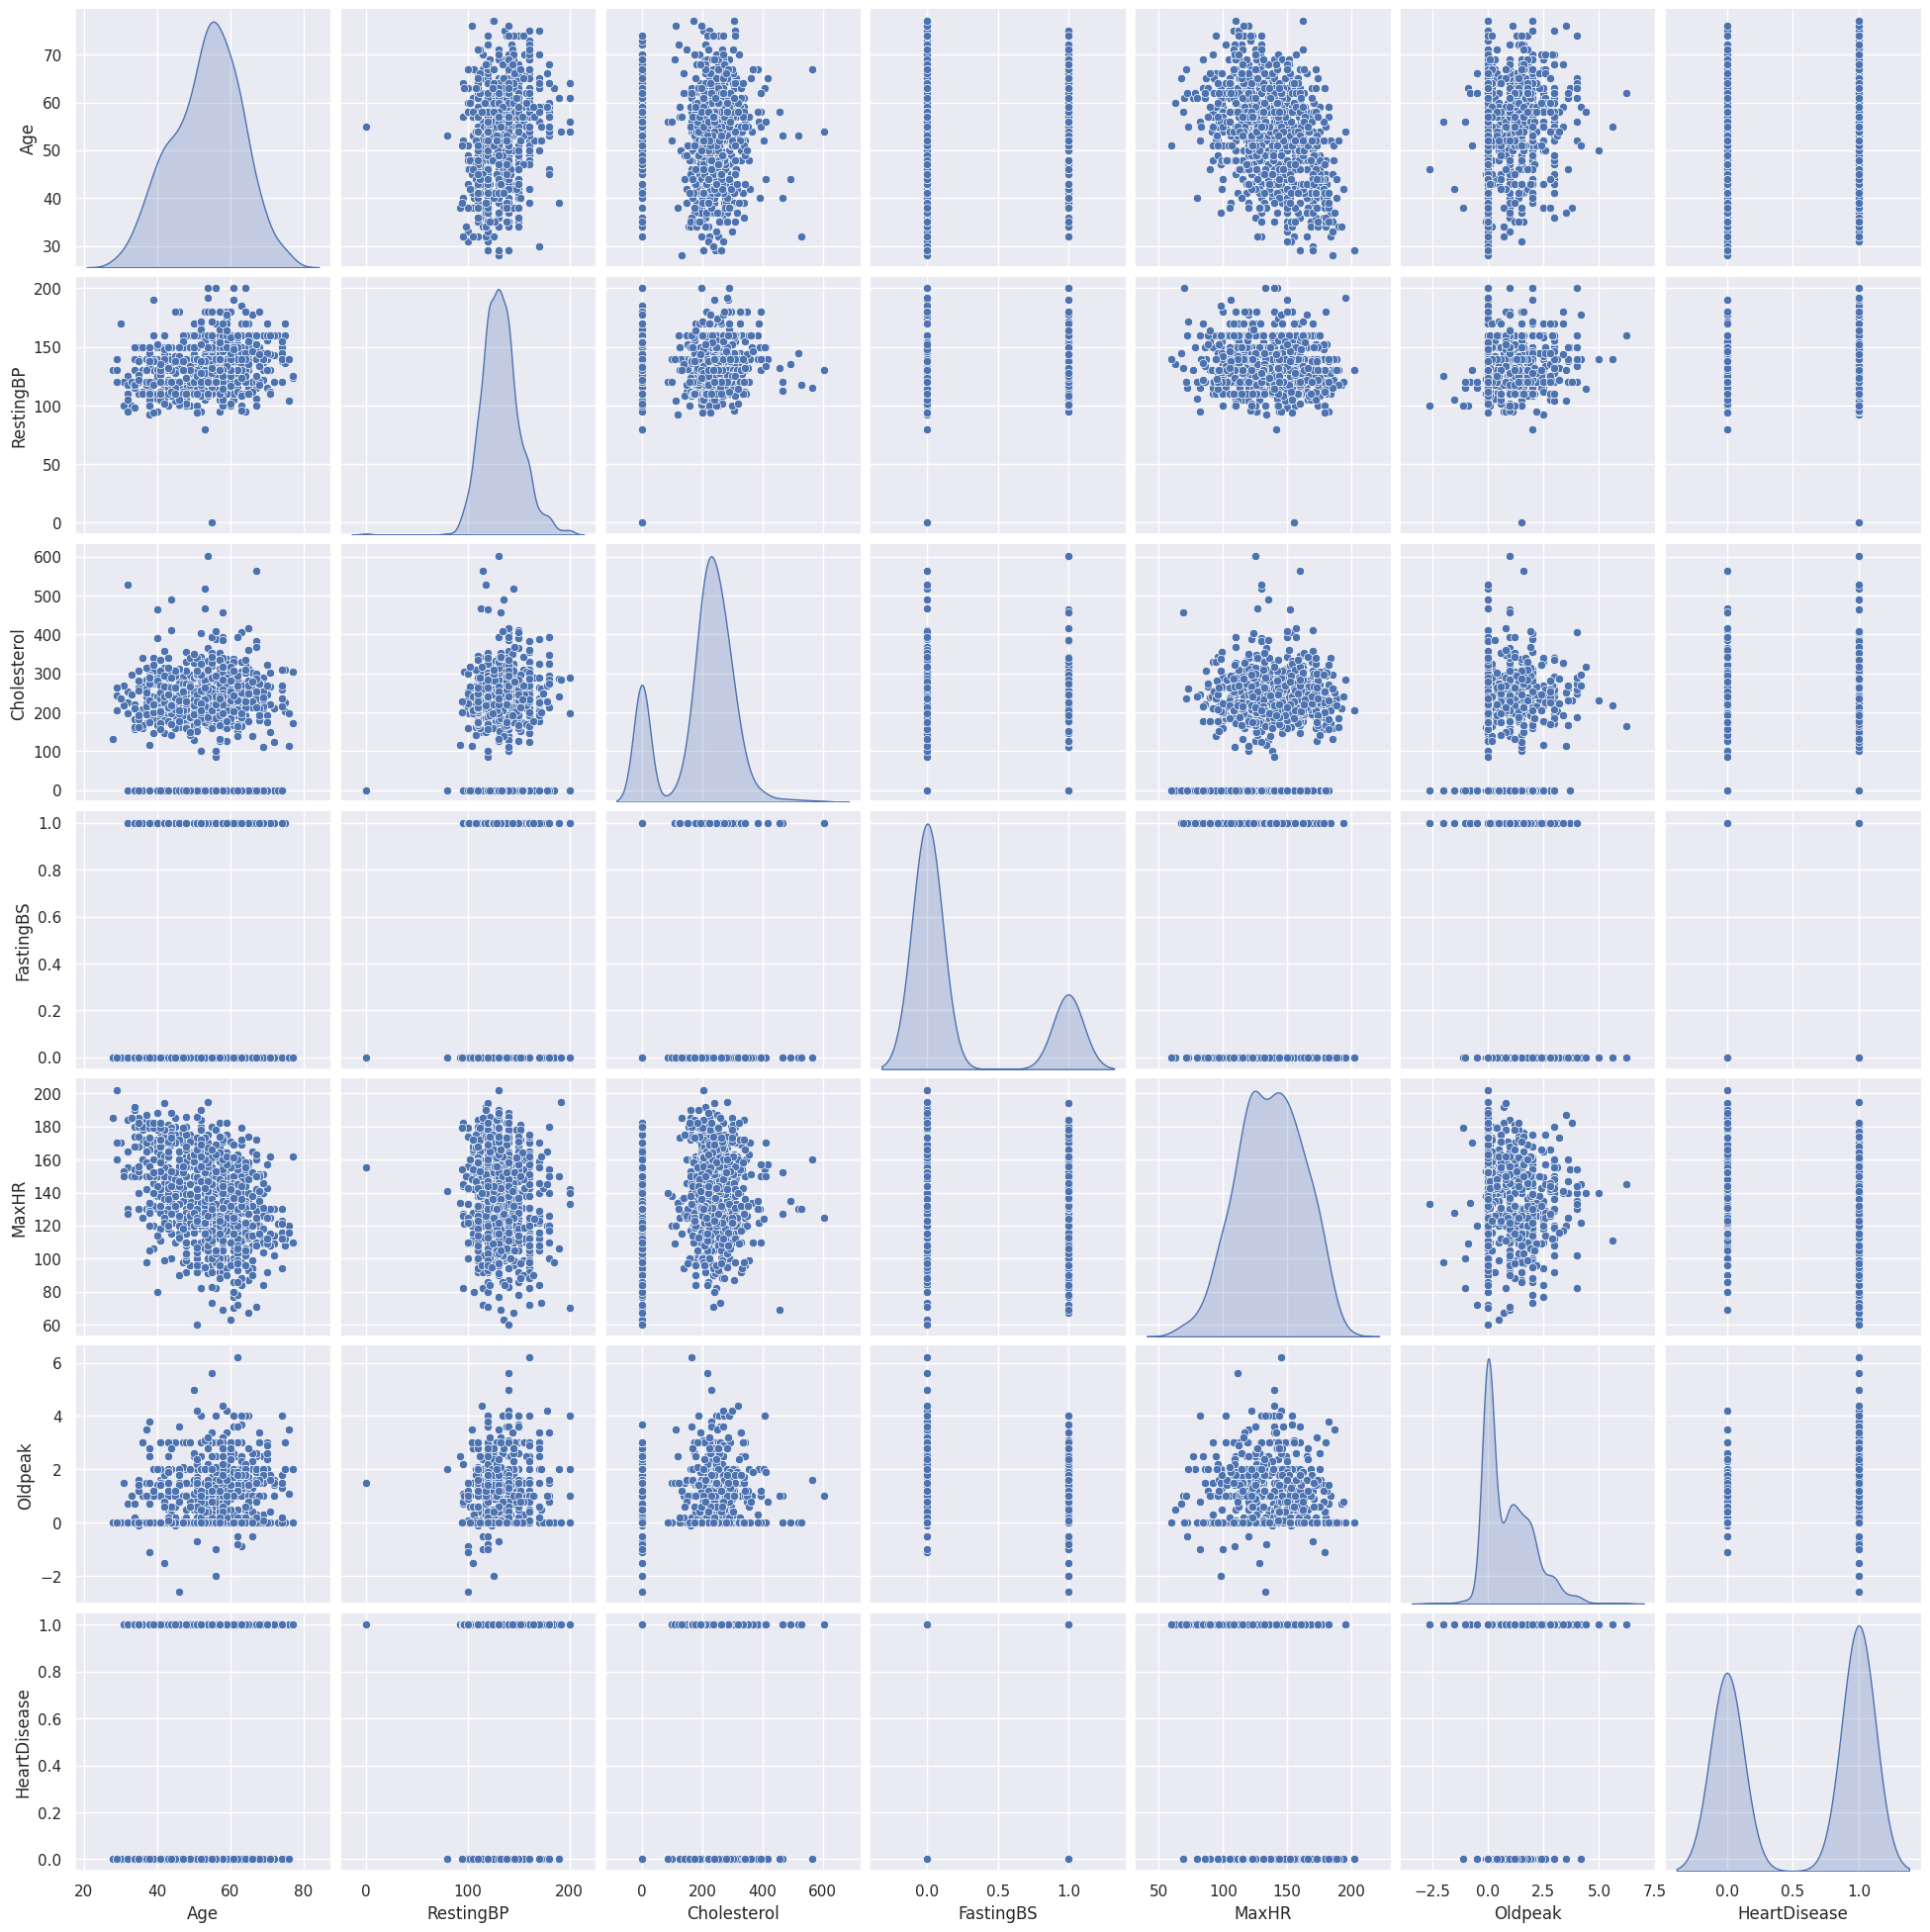

In [441]:
scatter_matrix = sns.pairplot(data, diag_kind='kde', plot_kws={'alpha': 1})
scatter_matrix.fig.set_size_inches(20, 20)
plt.show()

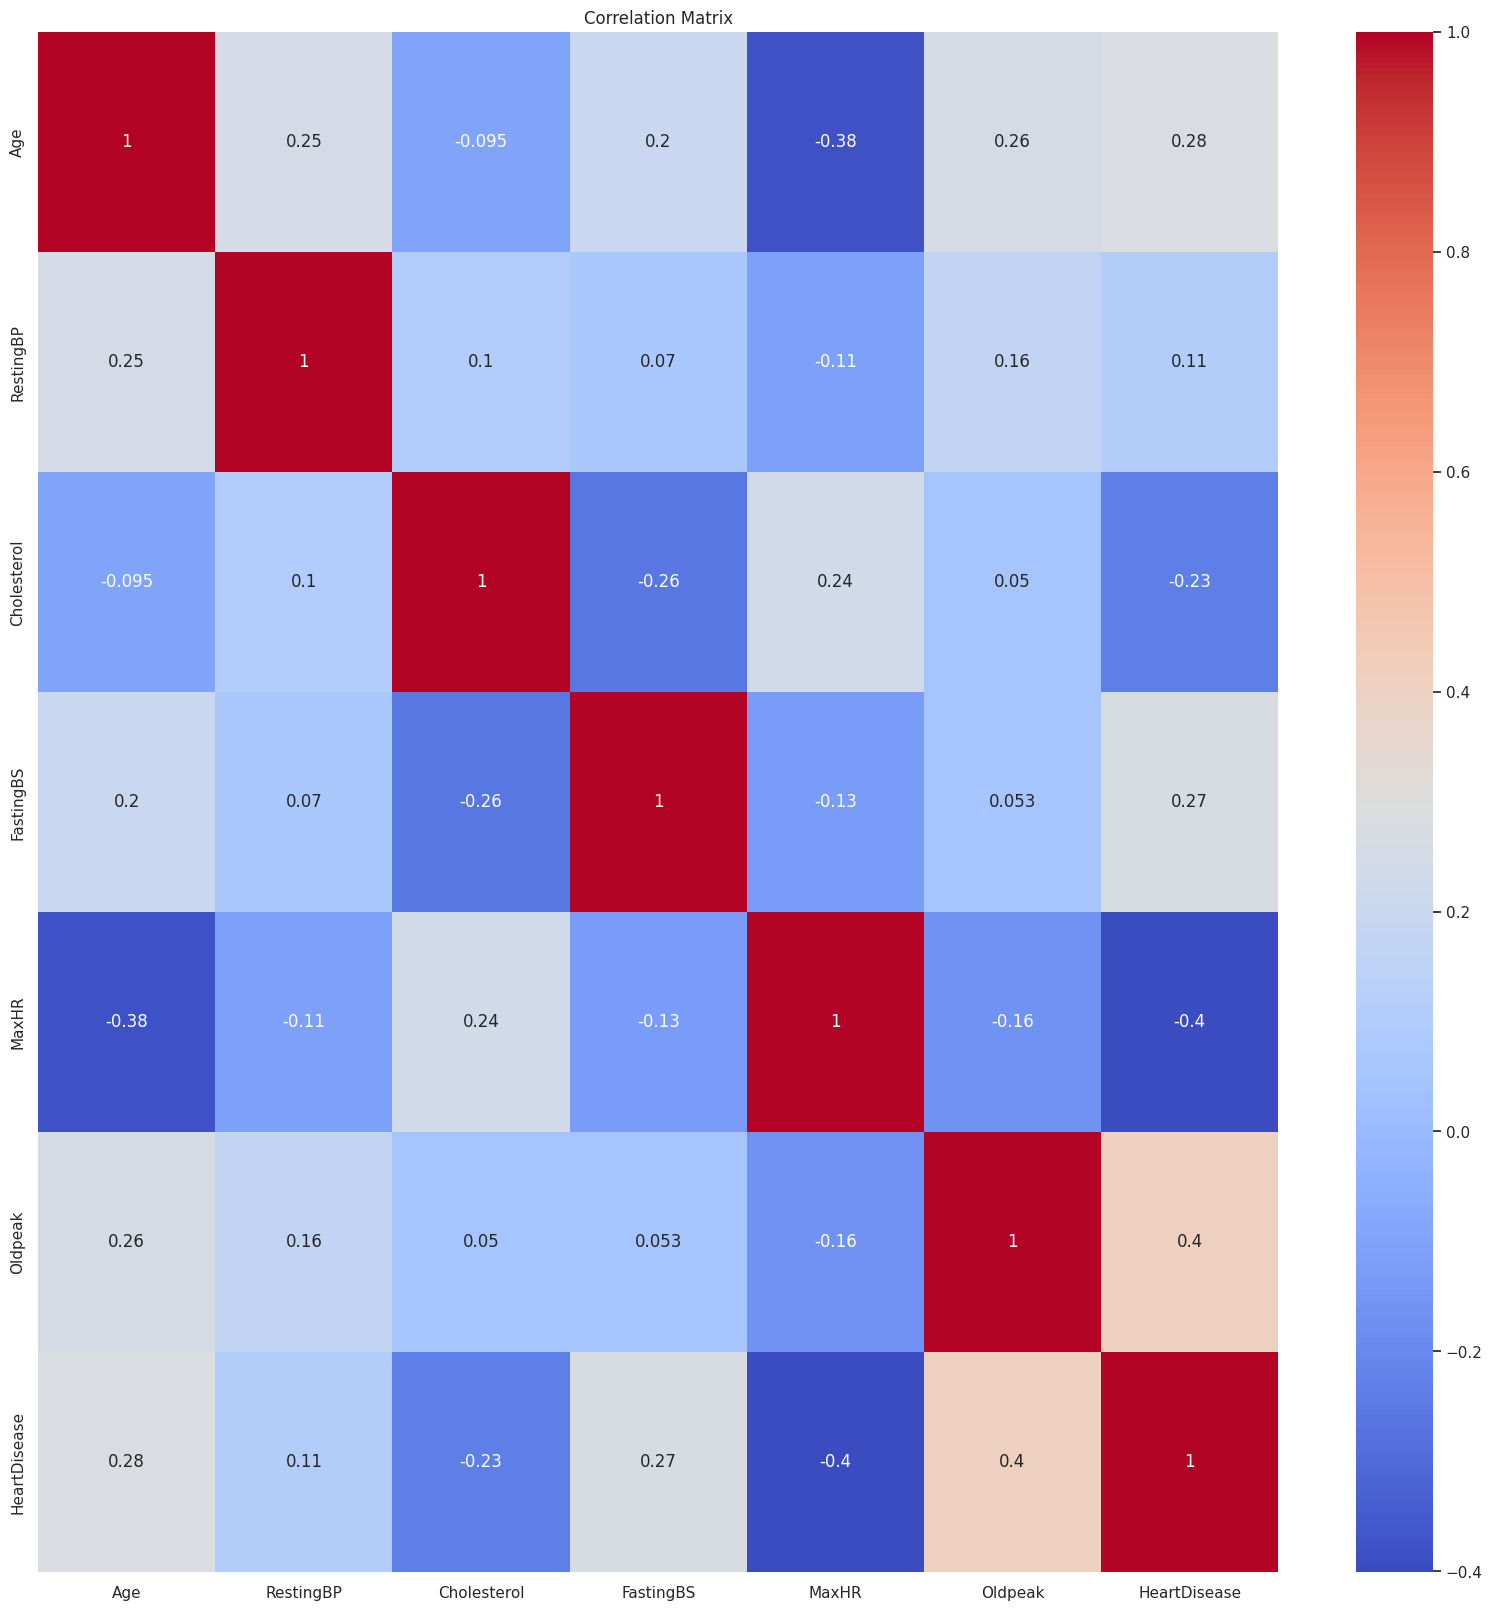

In [442]:
# Compute the correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### to ensure from wich features having a high multicollinearity

In [443]:
# Remove any non-numeric columns and missing_values target coulmn
X = data.select_dtypes(include=[np.number]).dropna()
X = X.drop("HeartDisease", axis=1)

# Compute the VIF for each independent variable
vif = pd.DataFrame()
vif["variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

      variable        VIF
0          Age  29.254296
1    RestingBP  42.122441
2  Cholesterol   4.980057
3    FastingBS   1.450433
4        MaxHR  19.690697
5      Oldpeak   1.849527


In [444]:
# Select variables with high VIF
high_vif_variables = vif[vif["VIF"] > 10]["variable"]
print(high_vif_variables)

0          Age
1    RestingBP
4        MaxHR
Name: variable, dtype: object


#### ---> from VIF 'WE NOTE'   Age , restingBP ,and MaxHR have a multicollinearity , from scatter_matrix we note that there is a linear pattren between(Age and MaxHR)  


# Data preprossing

## Data preprossing (handling multicollinearity)

In [445]:
# Create a subset of the data with the high VIF variables
subset_data = data[high_vif_variables]

# Standardize the variables
scaler = StandardScaler()
subset_data_scaled = scaler.fit_transform(subset_data)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(subset_data_scaled)

# Select the number of components to retain
# You can use a threshold or analyze the scree plot to make this decision

# For example, let's say you want to retain components that explain 90% of the variance
total_variance = 0
num_components = 0
for variance in pca.explained_variance_ratio_:
    total_variance += variance
    num_components += 1
    if total_variance >= 0.9:
        break

# Transform the data using the selected components
transformed_data = principal_components[:, :num_components]

# Replace the original features with the transformed data
data[high_vif_variables] = transformed_data

# Now the original features are replaced with the transformed data

#####  chechking for multicollinearity after preprossing

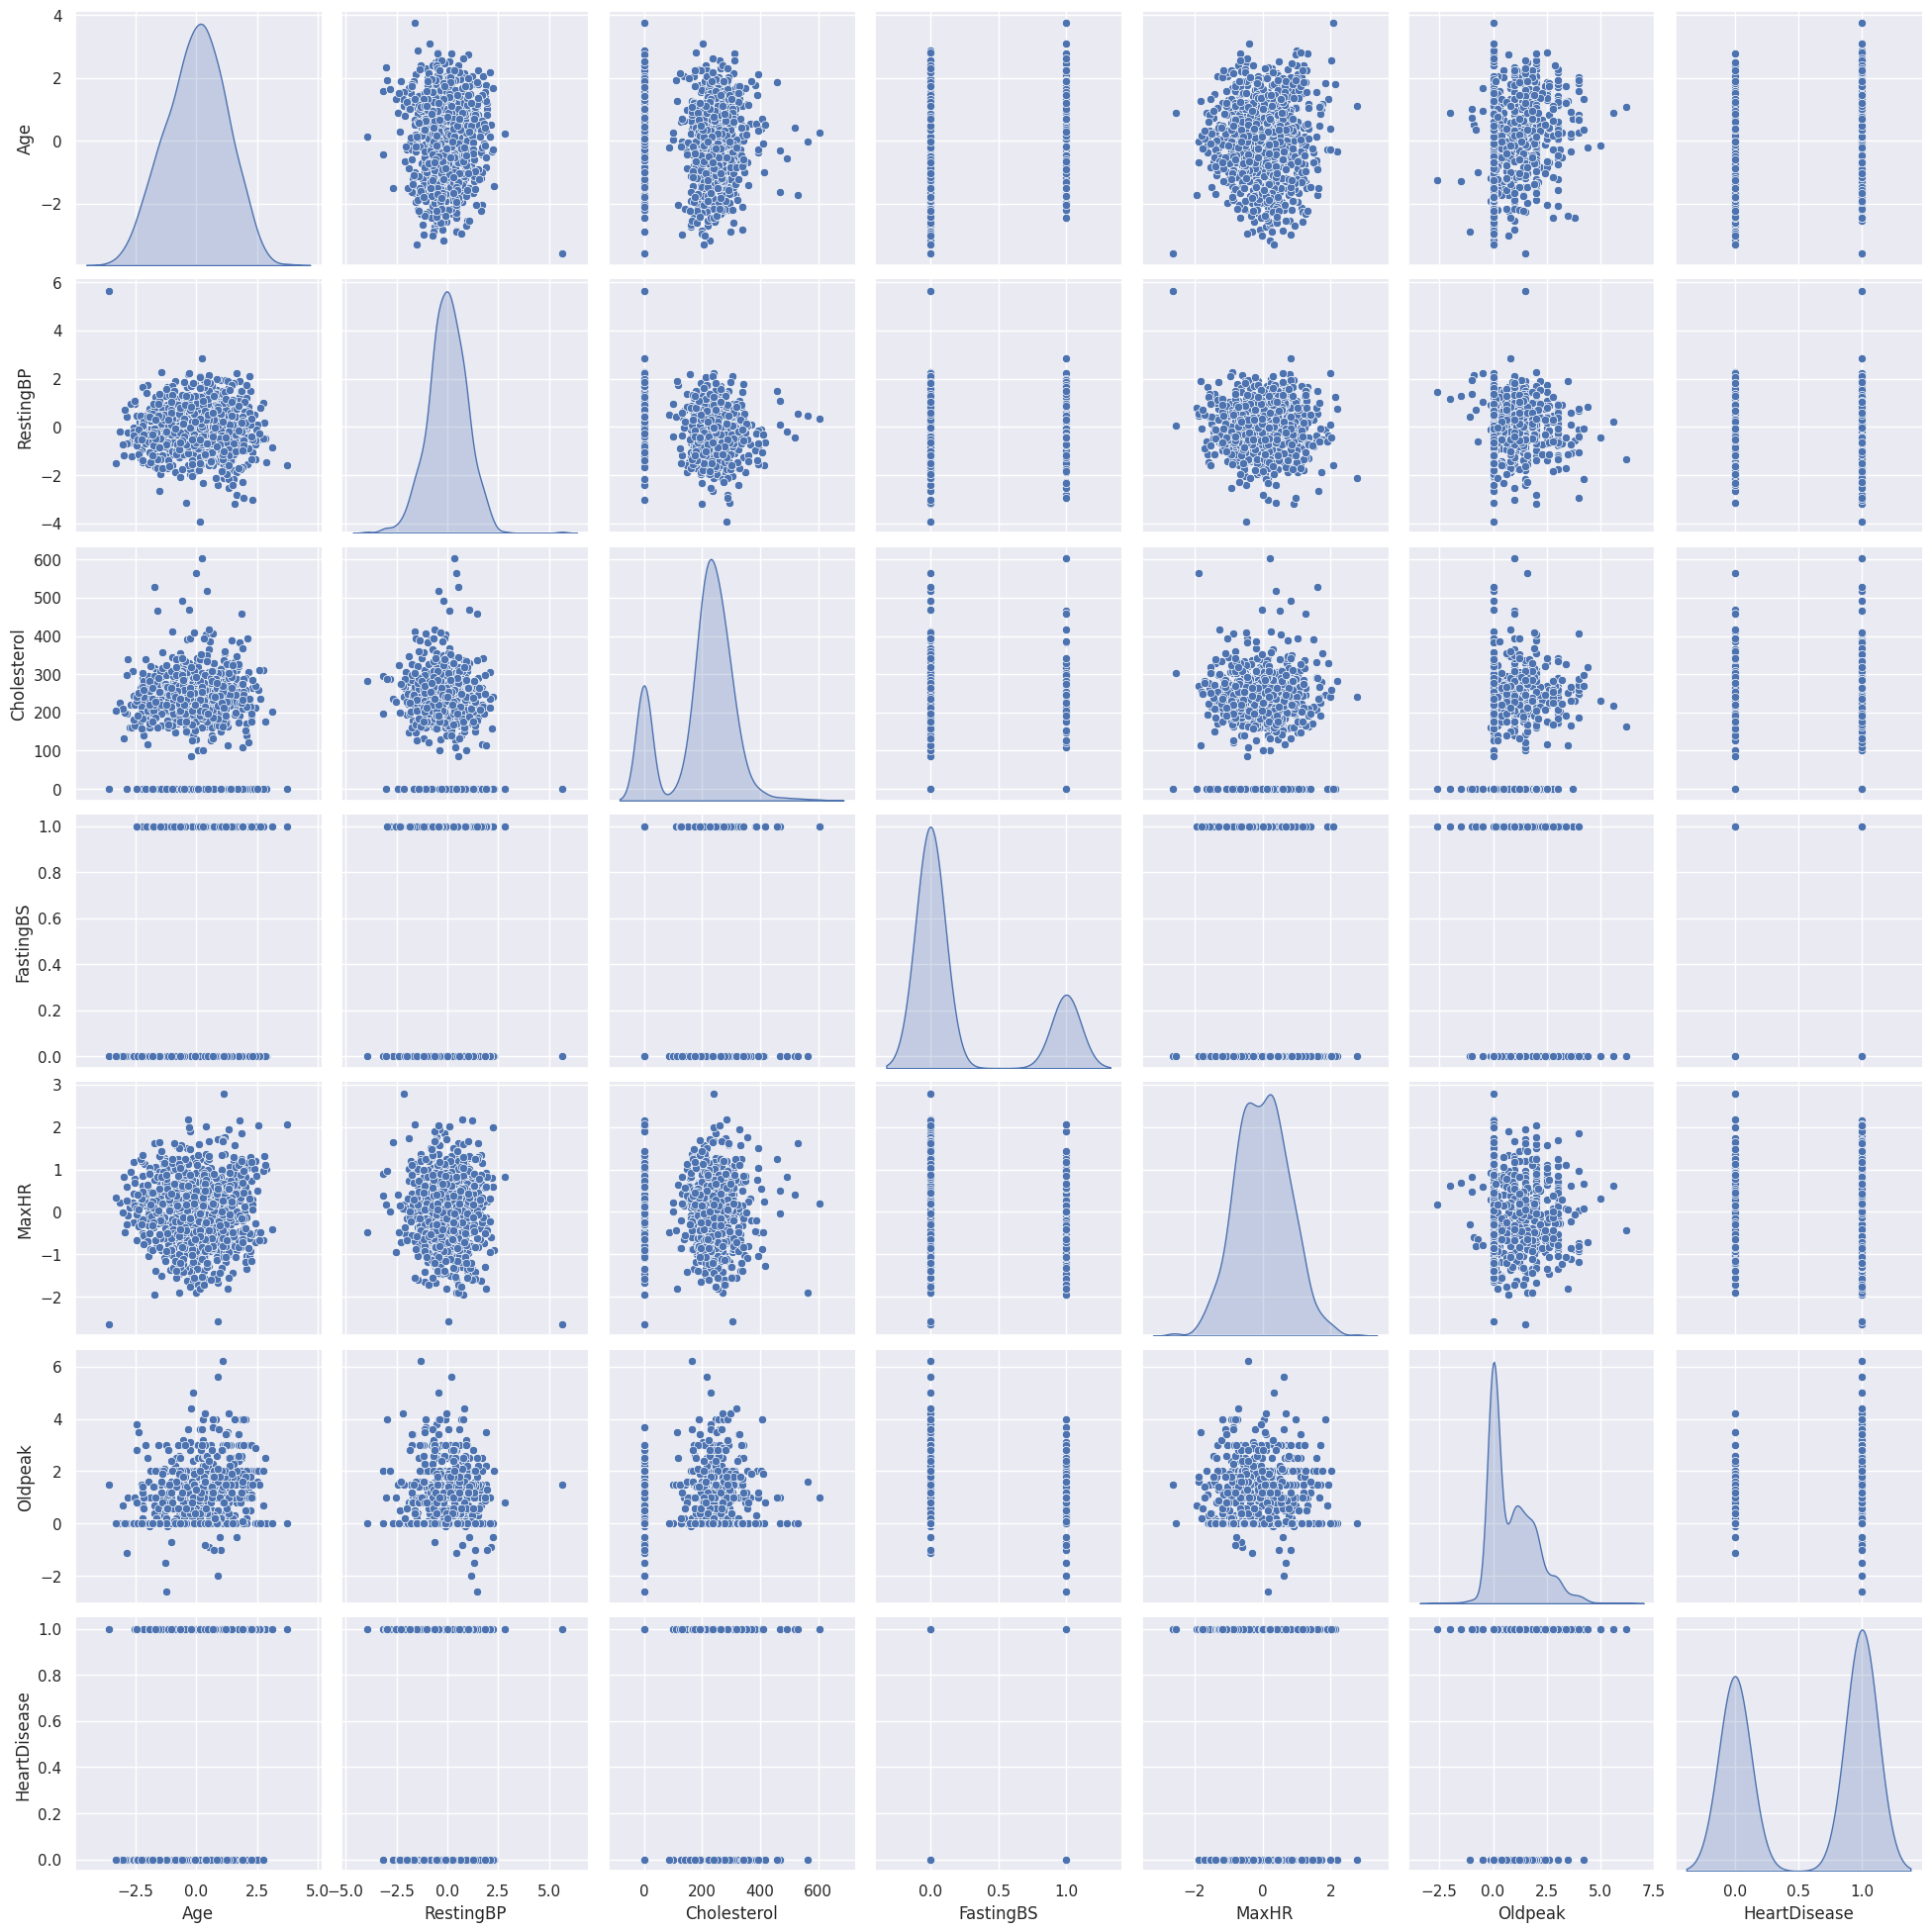

In [446]:
scatter_matrix = sns.pairplot(data, diag_kind='kde', plot_kws={'alpha': 1})
scatter_matrix.fig.set_size_inches(20, 20)
plt.show()

## Data preprossing (handling outliers)

#### ---> we cant use logarithmic in Oldpeak becouse it have 0 and negative data ,and we couldn't use square root becouse features is Non-linear relationships , so i will use Box_cox for oldpeak and logarithmic for cholesterol and restingbp , note that when i use Box_cox in cholesterol and restingbp the result having outliers so i decied to use log for them and it also having outliers and winsorization also having outliers , sigmoid , huber

In [542]:
#Dropping The illogical outlires
data = data[data['Cholesterol']!=0]
data = data[data['RestingBP']!=0]



In [545]:
# trasforming the data using Box_Cox

# Select a specific column or subset of columns from your dataset
selected_column = ['Oldpeak']
subset = data[selected_column]

# Shift the data to make it positive
shifted_data = subset - subset.min() + 1

# Apply the Box-Cox transformation to the shifted data
transformed_Oldpeak = np.empty_like(shifted_data)
for i, column in enumerate(shifted_data.columns):
    transformed_Oldpeak[:, i], _ = stats.boxcox(shifted_data[column])

# Replace the original values in the dataset with the transformed values
data[selected_column] = transformed_Oldpeak

<Axes: >

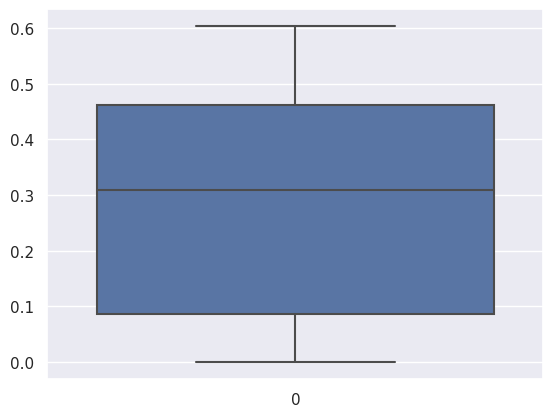

In [476]:
sns.boxplot(data['Oldpeak'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

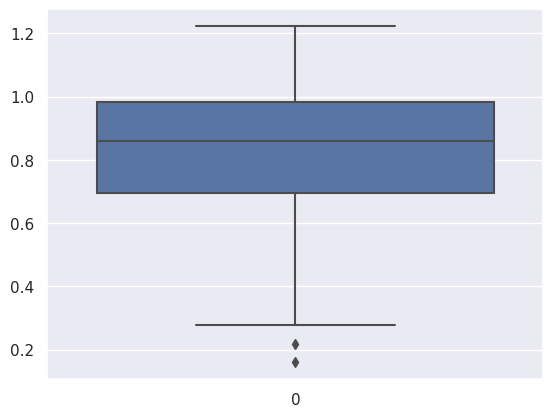

In [477]:
data['RestingBP'] = np.sqrt(data['RestingBP'])
sns.boxplot(data['RestingBP'])

<Axes: >

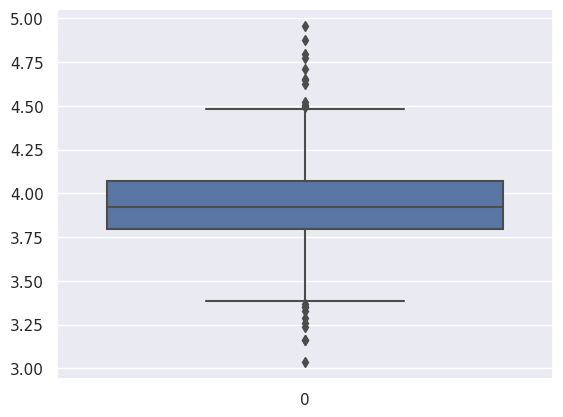

In [478]:
data['Cholesterol'] = np.sqrt(data['Cholesterol'])
sns.boxplot(data['Cholesterol'])

### ANOVA Test

#### (Age, heart deases )

In [479]:
# Assuming your data is in a DataFrame called 'data'
numeric_feature = data['Age']
categorical_target = data['HeartDisease']

# Perform ANOVA test
fvalue, pvalue = stats.f_oneway(numeric_feature, categorical_target)

# Check the significance
alpha = 0.05  # Set the significance level
if pvalue < alpha:
    print("The numeric feature is significantly associated with the categorical target.")
else:
    print("The numeric feature is not significantly associated with the categorical target.")

The numeric feature is significantly associated with the categorical target.


#### (RestingBP, heart deases )

In [480]:
# Assuming your data is in a DataFrame called 'data'
numeric_feature = data['RestingBP']
categorical_target = data['HeartDisease']

# Perform ANOVA test
fvalue, pvalue = stats.f_oneway(numeric_feature, categorical_target)

# Check the significance
alpha = 0.05  # Set the significance level
if pvalue < alpha:
    print("The numeric feature is significantly associated with the categorical target.")
else:
    print("The numeric feature is not significantly associated with the categorical target.")

The numeric feature is not significantly associated with the categorical target.


#### (Cholesterol, heart deases )

In [481]:
# Assuming your data is in a DataFrame called 'data'
numeric_feature = data['Cholesterol']
categorical_target = data['HeartDisease']

# Perform ANOVA test
fvalue, pvalue = stats.f_oneway(numeric_feature, categorical_target)

# Check the significance
alpha = 0.05  # Set the significance level
if pvalue < alpha:
    print("The numeric feature is significantly associated with the categorical target.")
else:
    print("The numeric feature is not significantly associated with the categorical target.")

The numeric feature is significantly associated with the categorical target.


#### (MaxHR, heart deases )

In [482]:
# Assuming your data is in a DataFrame called 'data'
numeric_feature = data['MaxHR']
categorical_target = data['HeartDisease']

# Perform ANOVA test
fvalue, pvalue = stats.f_oneway(numeric_feature, categorical_target)

# Check the significance
alpha = 0.05  # Set the significance level
if pvalue < alpha:
    print("The numeric feature is significantly associated with the categorical target.")
else:
    print("The numeric feature is not significantly associated with the categorical target.")

The numeric feature is significantly associated with the categorical target.


#### (Oldpeak, heart deases )

In [483]:
# Assuming your data is in a DataFrame called 'data'
numeric_feature = data['Oldpeak']
categorical_target = data['HeartDisease']

# Perform ANOVA test
fvalue, pvalue = stats.f_oneway(numeric_feature, categorical_target)

# Check the significance
alpha = 0.05  # Set the significance level
if pvalue < alpha:
    print("The numeric feature is significantly associated with the categorical target.")
else:
    print("The numeric feature is not significantly associated with the categorical target.")

The numeric feature is significantly associated with the categorical target.


##Encodding categorical data (one hot encoding)

In [484]:
data = pd.get_dummies (data,drop_first=True)
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.582699,NaN,4.123106,0,0.342931,0.086215,0,1,1,0,0,1,0,0,0,1
1,-0.082870,NaN,3.662842,0,0.332320,0.406252,1,0,0,1,0,1,0,0,1,0
2,-0.319831,0.926717,4.101537,0,2.182616,0.086215,0,1,1,0,0,0,1,0,0,1
3,0.420053,0.731715,3.824753,0,1.206884,0.461747,1,0,0,0,0,1,0,1,1,0
4,0.813351,NaN,3.736876,0,0.591563,0.086215,0,1,0,1,0,1,0,0,0,1


# Data Modeling

## Data Preparation

### Data Separation as X and Y

In [553]:
Y= data['HeartDisease']
X= data.drop('HeartDisease',axis=1)

### split the data in training set and test set

In [556]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

In [557]:
print('Data:    ',data.shape)
print('----------------')
print('X train: ',X_train.shape)
print('Y train: ',Y_train.shape)
print('----------------')
print('X test:  ',X_test.shape)
print('Y test:  ',Y_test.shape)

Data:     (746, 16)
----------------
X train:  (596, 15)
Y train:  (596,)
----------------
X test:   (150, 15)
Y test:   (150,)


## Model Bullding

In [559]:
# Define the columns to be rescaled
columns_to_rescale = ['Cholesterol','Oldpeak']
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler only on the selected columns in the training set
scaler.fit(X_train[columns_to_rescale])

# Transform the selected columns in the training set
X_train[columns_to_rescale] = scaler.transform(X_train[columns_to_rescale])

# Transform the selected columns in the test set
X_test[columns_to_rescale] = scaler.transform(X_test[columns_to_rescale])

#to transform data from array to data fram
X_train=pd.DataFrame(X_train, columns=X_train.columns)

X_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
161,0.522790,1.000669,-0.504127,0,1.256460,-1.086781,1,0,0,0,1,0,1,1,0
104,-0.586587,0.956964,-1.036727,0,0.667847,-1.086781,1,0,0,0,1,0,0,1,0
448,2.089632,-0.084303,-0.163486,1,0.447174,0.671467,1,0,0,0,1,0,1,1,0
828,0.342885,0.780268,-0.426606,0,-0.283469,1.147211,1,0,0,0,0,0,1,1,0
3,0.420053,0.731715,-0.465231,0,1.206884,0.932270,0,0,0,0,1,0,1,1,0


### Applaying the model

In [562]:
# Create a logistic regression model
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred = logreg.predict(X_test)

### Model's Accuracy

In [563]:
# Evaluate the model's accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8866666666666667


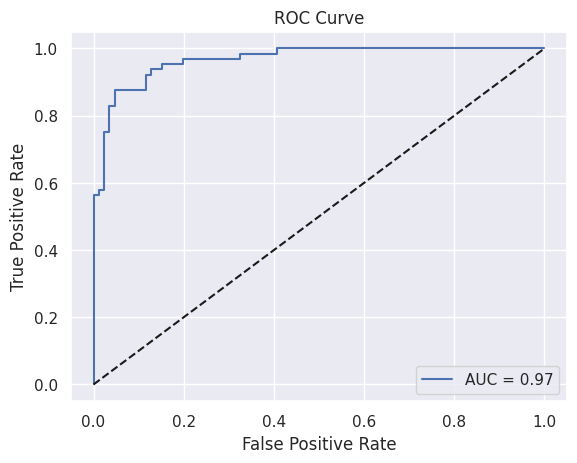

In [502]:
# Calculate the probabilities for each class
y_prob = logreg.predict_proba(x_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [503]:
# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        86
           1       0.85      0.89      0.87        64

    accuracy                           0.89       150
   macro avg       0.88      0.89      0.88       150
weighted avg       0.89      0.89      0.89       150



# logistic regression from scratch

## sigmoid function

In [504]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## cost function

In [564]:
def compute_cost(X, Y, theta):
    m = len(Y)
    h = sigmoid(np.dot(X, theta))
    cost = -(1/m) * np.sum(Y*np.log(h) + (1-Y)*np.log(1-h))
    return cost

## Define the gradient descent function

In [565]:
def gradient_descent(X, Y, theta, alpha, num_iters):
    m = len(Y)
    costs = []

    for _ in range(num_iters):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - Y)) / m
        theta -= alpha * gradient
        cost = compute_cost(X, Y, theta)
        costs.append(cost)

    return theta, costs

In [566]:
def logistic_regression(X, Y, alpha, num_iters):
    # Initialize parameters
    num_samples, num_features = X.shape
    intercept = np.ones((num_samples, 1))
    X = np.concatenate((intercept, X), axis=1)
    weights = np.zeros(num_features + 1)

    # Gradient descent
    weights, costs = gradient_descent(X, Y, weights, alpha, num_iters)

    return weights, costs

## Prepare the data

In [567]:
# Assuming X is a matrix of input features and y is the target variable vector
# Add a column of ones to X for the bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))

## Train the model

In [568]:
# Initialize the model parameters
theta = np.zeros(X.shape[1])

# Set the hyperparameters
alpha = 0.01
num_iters = 1000

# Train the model
theta, costs = gradient_descent(X, Y, theta, alpha, num_iters)

##Make predictions

In [569]:
# Assuming X_test is a matrix of input features for the test set

# Add a column of ones to X_test for the bias term
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)

# Calculate the probability of the positive class
probabilities = sigmoid(np.dot(X_test, theta))

# Make predictions based on a threshold
predictions = (probabilities >= 0.5).astype(int)

## Model's Accurcy

In [570]:
def evaluate_accuracy(Y_true, Y_pred):
    # Calculate the accuracy by comparing the predicted labels with the true labels
    accuracy = np.mean(Y_true == Y_pred)
    return accuracy

# Assuming y_test contains the true labels for the test set and predictions contains the predicted labels
accuracy = evaluate_accuracy(Y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 87.33%
